In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [68]:
class Generator():
    def __init__(self,image_size, hidden_size, model_detail):
        self.image_size = image_size
        self.hidden_size = hidden_size
        self.model_detail = model_detail
        
    def __call__():
        return create_graph(self.image_size, self.hidden_size, self.model_detail )
    
    def __repr__(self):
        return 'image_size : {} ,hidden_size : {}'.format(self.image_size,self.hidden_size)
    
    def print_graph(self):
        return 'Layer : {} Name : {}'.format()


class Discriminator():
    def __init__(self, latent_size, hidden_size, model_details):
        self.latent_size = latent_size
        self.hidden_size = hidden_size
        self.model_detail = model_details
        
    def __call__():
        return create_graph(self.latent_size, self.hidden_size, self.model_detail)
    
    def __repr__(self):
        return self.print_graph()
    
    def print_graph(self):
        return 'latent_size : {} , hidden_size : {}'.format(self.latent_size, self.hidden_size)
        
        
        



In [3]:
#GAN

import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision 
import torch.nn as nn
from torchvision import transforms

In [4]:
batch_size = 100

device =  torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [5]:
tranform = transforms.Compose([ transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,))])

In [8]:
mnist = torchvision.datasets.MNIST(root='datasets/', train=True, transform=tranform, download=True )

0it [00:00, ?it/s]

Extracting datasets/MNIST/raw/train-images-idx3-ubyte.gz to datasets/MNIST/raw


0it [00:00, ?it/s]

Extracting datasets/MNIST/raw/train-labels-idx1-ubyte.gz to datasets/MNIST/raw


0it [00:00, ?it/s]

Extracting datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to datasets/MNIST/raw


0it [00:00, ?it/s]

Extracting datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to datasets/MNIST/raw
Processing...
Done!


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729047590/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
data_loader = torch.utils.data.DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True )

In [10]:
images, labels = iter(data_loader).next()

In [11]:
images

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., 

In [12]:
labels

tensor([4, 3, 6, 7, 4, 6, 6, 7, 9, 1, 7, 4, 2, 0, 0, 0, 3, 0, 3, 6, 2, 1, 3, 1,
        6, 2, 9, 5, 8, 6, 3, 5, 3, 8, 5, 3, 0, 3, 7, 0, 6, 1, 1, 7, 9, 0, 8, 8,
        7, 7, 8, 5, 0, 5, 6, 9, 4, 1, 6, 8, 3, 7, 3, 3, 1, 8, 9, 1, 6, 0, 2, 0,
        1, 0, 0, 3, 2, 0, 8, 7, 3, 1, 2, 2, 4, 3, 2, 3, 0, 1, 3, 7, 1, 9, 0, 7,
        9, 3, 7, 3])

In [13]:
#grid 
img = torchvision.utils.make_grid(images)

In [14]:
img = img.detach().numpy()
img = img.clip(0,1)

<function matplotlib.pyplot.show(close=None, block=None)>

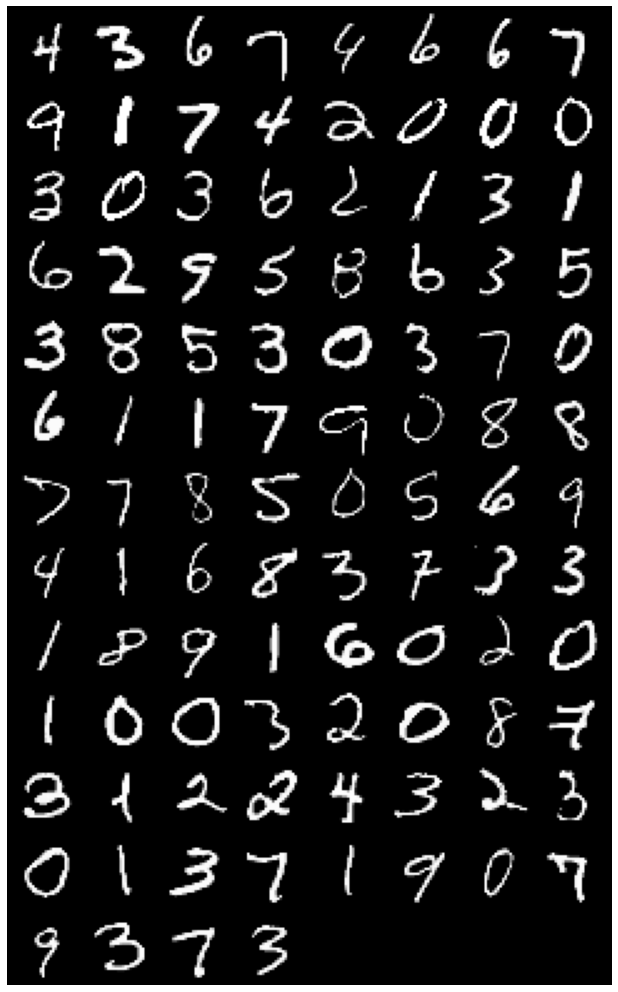

In [16]:
plt.figure(figsize=(12,18))
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show

In [17]:
#GAN model parameter
latent_size = 64
hidden_size = 256
image_size = 784
number_epochs = 100

In [18]:
D = nn.Sequential(nn.Linear(image_size, hidden_size),
                 nn.LeakyReLU(0.2),
                 nn.Dropout(0.5),
                 nn.Linear(hidden_size,hidden_size),
                 nn.LeakyReLU(0.2),
                 nn.Dropout(0.5),
                 nn.Linear(hidden_size,1),
                 nn.Sigmoid())

G = nn.Sequential(nn.Linear(latent_size, hidden_size),
                 nn.ReLU(),
                 nn.Linear(hidden_size,hidden_size),
                 nn.ReLU(),
                 nn.Linear(hidden_size,image_size),
                 nn.Tanh())

In [19]:
D = D.to(device)
G = G.to(device)

In [20]:
bce_loss = nn.BCELoss()

d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [21]:
total_step = len(data_loader)
total_step

600

In [22]:
for epoch  in range(number_epochs):
    
    for i , (images, _) in enumerate(data_loader):
        
        
        images = images.reshape(batch_size, -1).to(device)
        
        real_labels = torch.ones(batch_size, 1).to(device)
        
        fake_labels = torch.zeros(batch_size,1).to(device)
        
        outputs = D(images)
        
        d_loss_real = bce_loss(outputs, real_labels)
        real_score = outputs
        
        z = torch.randn(batch_size, latent_size).to(device)
        
        fake_images = G(z)
        
        outputs = D(fake_images)
        
        d_loss_fake = bce_loss(outputs,fake_labels)
        fake_score = outputs
        
        
        d_loss = d_loss_real + d_loss_fake
        
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        
        d_loss.backward()
        
        d_optimizer.step()
        
        
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        g_loss = bce_loss(outputs, real_labels)
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        
        g_loss.backward()
        g_optimizer.step()
        
        if(i+1)%200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss : {:.4f}, g_loss : {:.4f}, D(x) : {:.2f}, D(G(z)): {:.2f}'.format(epoch, number_epochs, i+1, total_step, d_loss.item(), g_loss.item(),real_score.mean().item(), fake_score.mean().item() ))
        
        fake_images = fake_images.reshape(fake_images.size(0), 1 , 28, 28)
        

Epoch [0/100], Step [200/600], d_loss : 0.0591, g_loss : 4.9010, D(x) : 0.98, D(G(z)): 0.04
Epoch [0/100], Step [400/600], d_loss : 0.1973, g_loss : 4.3482, D(x) : 0.93, D(G(z)): 0.10
Epoch [0/100], Step [600/600], d_loss : 0.4153, g_loss : 3.2932, D(x) : 0.86, D(G(z)): 0.18
Epoch [1/100], Step [200/600], d_loss : 0.3275, g_loss : 2.9213, D(x) : 0.89, D(G(z)): 0.16
Epoch [1/100], Step [400/600], d_loss : 0.8796, g_loss : 1.5313, D(x) : 0.67, D(G(z)): 0.30
Epoch [1/100], Step [600/600], d_loss : 0.7241, g_loss : 1.5941, D(x) : 0.74, D(G(z)): 0.26
Epoch [2/100], Step [200/600], d_loss : 1.1828, g_loss : 0.9583, D(x) : 0.65, D(G(z)): 0.43
Epoch [2/100], Step [400/600], d_loss : 0.5665, g_loss : 2.2823, D(x) : 0.77, D(G(z)): 0.19
Epoch [2/100], Step [600/600], d_loss : 0.3387, g_loss : 3.0195, D(x) : 0.87, D(G(z)): 0.10
Epoch [3/100], Step [200/600], d_loss : 0.6873, g_loss : 2.2847, D(x) : 0.79, D(G(z)): 0.21
Epoch [3/100], Step [400/600], d_loss : 0.6792, g_loss : 2.3583, D(x) : 0.78, D(

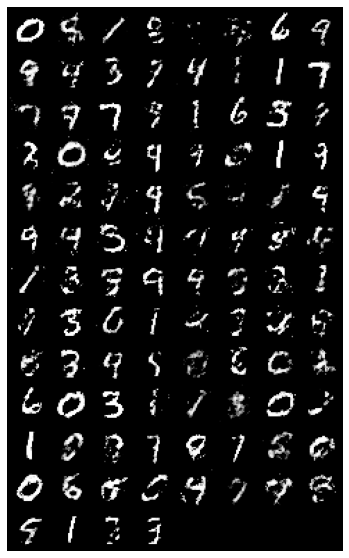

In [24]:
img  = torchvision.utils.make_grid(fake_images)

img = img.detach().cpu().numpy()

img = img.clip(0,1)

plt.figure(figsize= (12,10))

plt.imshow(np.transpose(img, (1,2,0)))

plt.axis('off')
plt.show()

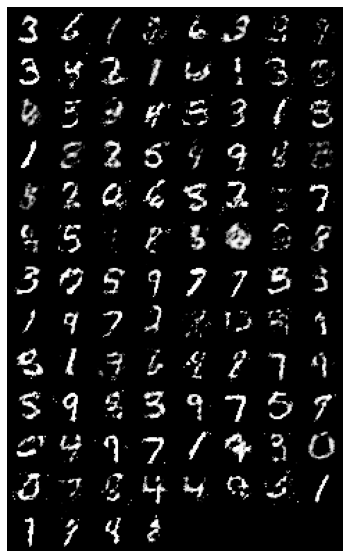

In [33]:
z = torch.randn(batch_size, latent_size).to(device)

fake_images = G(z)

fake_images= fake_images.reshape(fake_images.size(0), 1 , 28, 28)

img  = torchvision.utils.make_grid(fake_images)

img = img.detach().cpu().numpy()

img = img.clip(0,1)

plt.figure(figsize= (12,10))

plt.imshow(np.transpose(img, (1,2,0)))

plt.axis('off')
plt.show()